In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

## Cel
Celem ćwiczenia, jest predykcja przyszłych wypożyczeń rowerów na podstawie danych historycznych (2011-2012). W tych danych jednak brakuje warości, która określa wypożyczoną liczbę rowerów (od 20 dnia danego miesiąca do jego końca). Celem będzie predykcja tych wartości. Kiedy te wartości zostaną zalezione, wykonam predykcję szeregu czasowego na podstawie zmiennej *counts* (liczba rowerów wypożyczoych w danej godzinie).

## Analiza danych
### Objaśnienie zmiennych
- datetime - godzina oraz data
- season -  1 = wiosna, 2 = lato, 3 = jesień, 4 = zima 
- holiday - określa czy dzień jest wolny od pracy (1) lub nie (0)
- workingday - określa czy dzień jest dniem roboczym (1) lub nie (0)
- weather 

1: przejrzyście, lekkie/częsciowe zachmurzenie

2: mgła + zachmurzenie, mgła + "połamane" chmury, mgła + lekkie zachmurzenie, Mgła

3: Lekki śnieg, Lekki deszcz + Burza + Rozproszone chmury, Lekki deszcz + Rozproszone chmury

4: Ulewny deszcz + granulki lodu + burza z piorunami + zamglenue, śnieg + mgła
- temp - temperatura w stopnach Celsiusa
- atemp - odczuwalna temperatura w stopnach Celsiusa
- humidity - wilgotność względna
- windspeed - prekość wiatru
- casual - liczba wypożyczonych rowerów przez użytkowników niezarejestrowanych
- registered - liczba wypożyczonych rowerów przez użytkowników zarejestrowanych
- count - liczba wszystkich wypożyczonych rowerów (casual + registered)

In [2]:
train_data = pd.read_csv("dataset/train.csv", parse_dates=["datetime"])
missing_data = pd.read_csv("dataset/test.csv", parse_dates=["datetime"])

In [3]:
train_data["year"] = train_data["datetime"].dt.year
train_data["month"] = train_data["datetime"].dt.month
train_data["day"] = train_data["datetime"].dt.day
train_data["hour"] = train_data["datetime"].dt.hour

In [4]:
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


### Badanie zmiennych czasowych

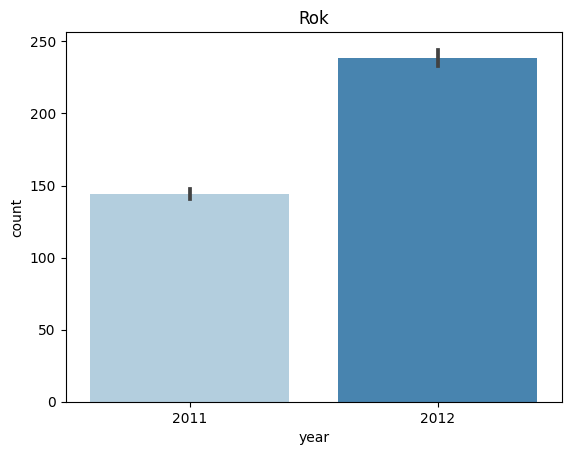

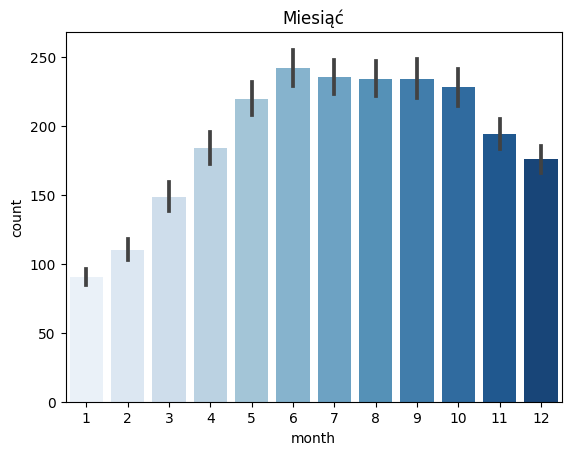

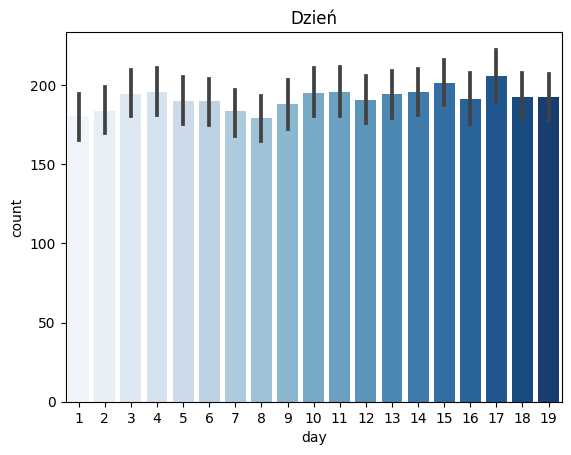

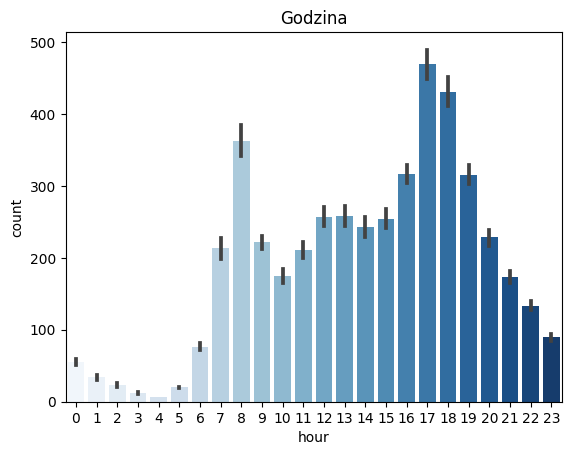

In [6]:
plt.title("Rok")
sb.barplot(x=train_data["year"], y=train_data["count"], palette="Blues")
plt.show()
plt.title("Miesiąć")
sb.barplot(x=train_data["month"], y=train_data["count"], palette="Blues")
plt.show()
plt.title("Dzień")
sb.barplot(x=train_data["day"], y=train_data["count"], palette="Blues")
plt.show()
plt.title("Godzina")
sb.barplot(x=train_data["hour"], y=train_data["count"], palette="Blues")
plt.show()

Wnioski:
- widać trend (roczny)
- widać sezonowość (w zależności od miesiąca liczba wypożyczonych rowerów jest różna)
- zależność od dnia miesiąca zbytnio nie występuje
- zależność od godziny jest znacząca
### Badanie reszty zmienych

In [7]:
train_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'

In [ ]:
sb.barplot(x=train_data["month"], y=train_data["count"], palette="Blues")
# sb.boxenplot(x=train_data["day"], y=train_data["count"], palette="Blues")

In [ ]:
missing_data

In [ ]:
pd.concat([train_data, missing_data])